In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("winequality.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately_High
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low


In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
 13  acidity_levels        5319 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 582.0+ KB


In [5]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
acidity_levels          1
dtype: int64

In [6]:
df["quality"].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

## Let's Visualize the Data

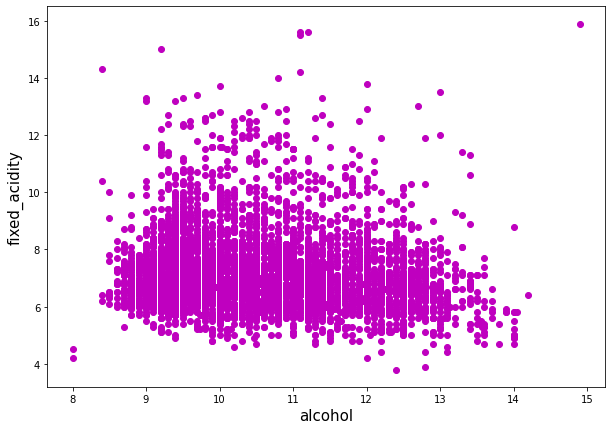

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed_acidity",data =df,marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

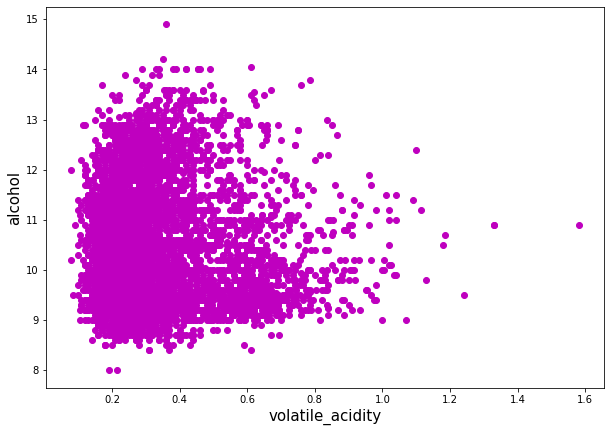

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x="volatile_acidity",y="alcohol",data =df,marker= 'o',c="m")
plt.xlabel("volatile_acidity",fontsize=15)
plt.ylabel("alcohol",fontsize=15)
plt.show()

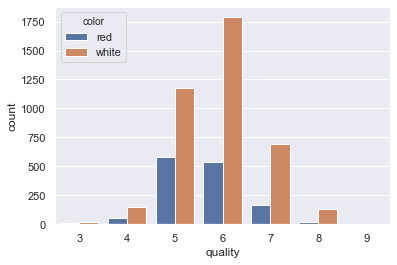

In [9]:
sns.set(style="darkgrid")
sns.countplot(df["quality"],hue="color",data=df)
plt.show()

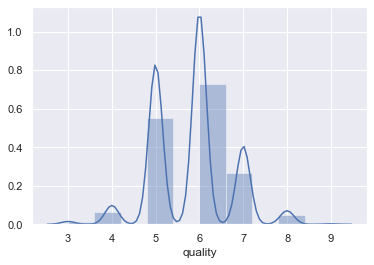

In [10]:
sns.set()
sns.distplot(df["quality"],bins=10)
plt.show()

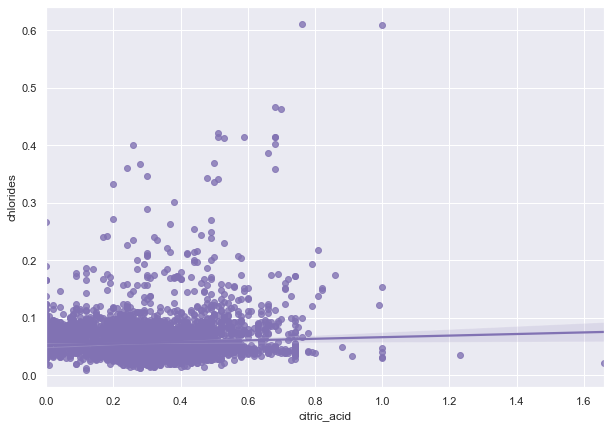

In [11]:
plt.figure(figsize=(10,7))
sns.regplot(x="citric_acid",y="chlorides",data =df,marker= 'o',color="m")
plt.show()

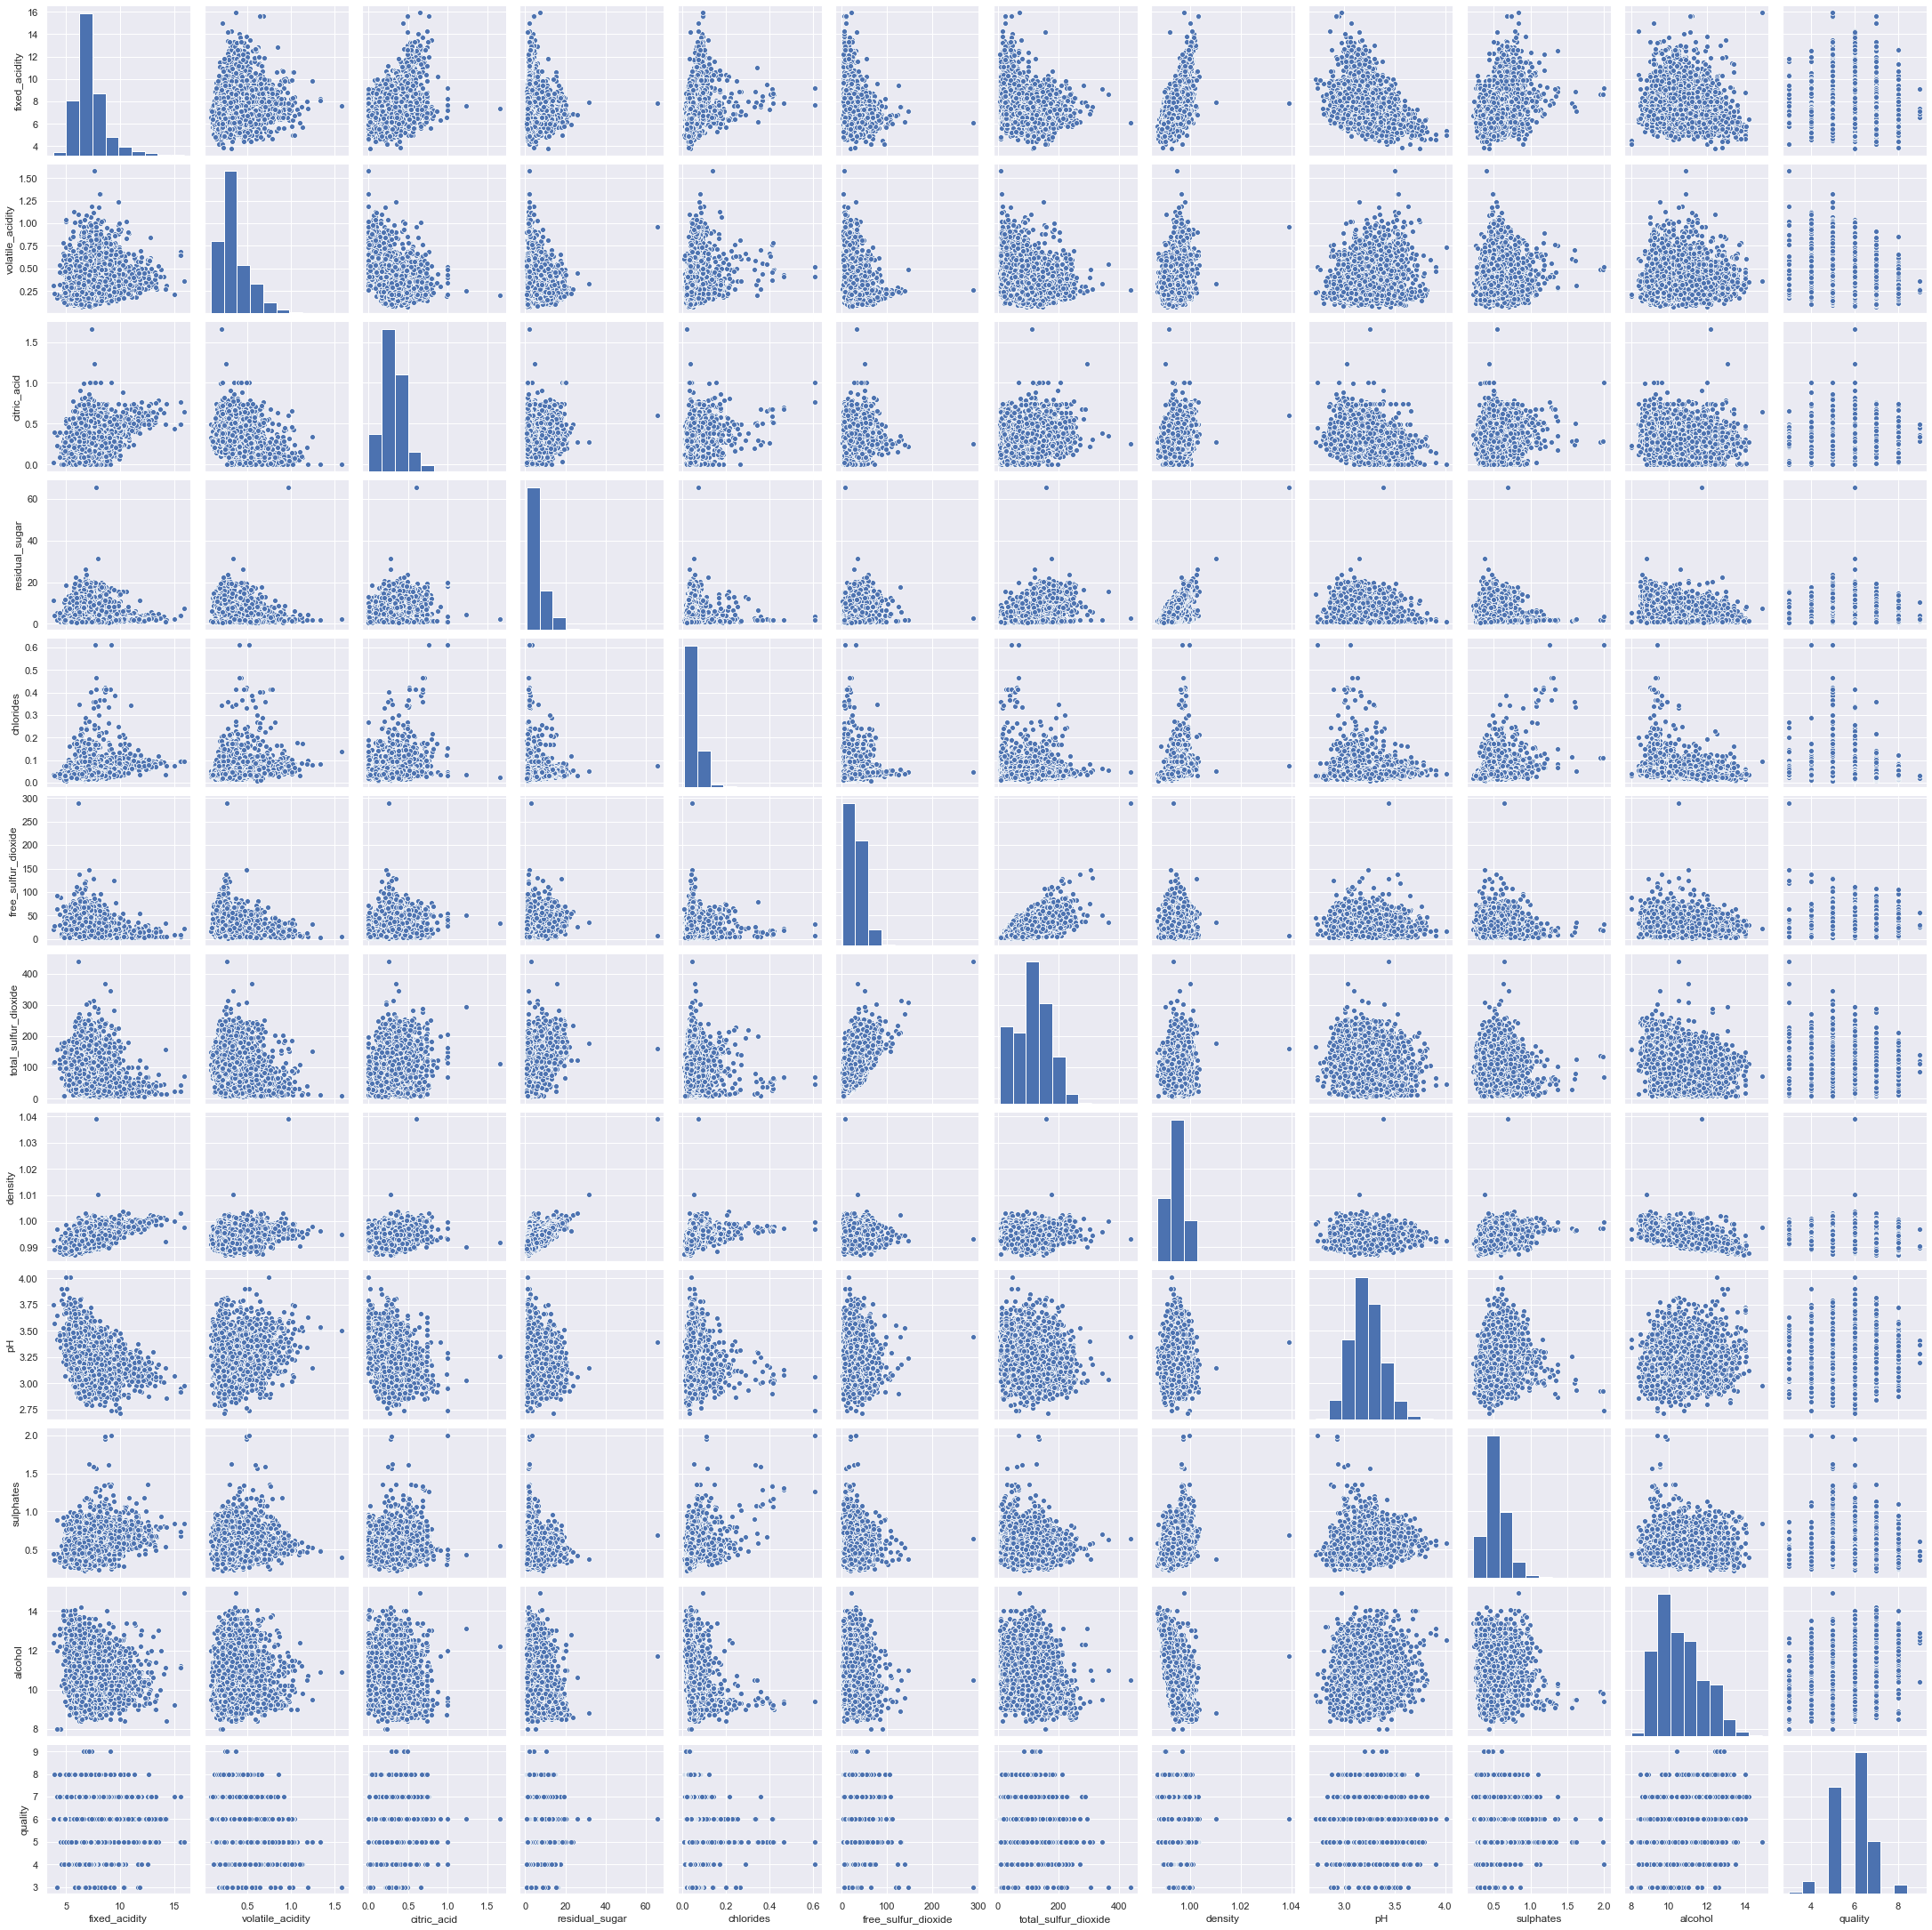

In [12]:
sns.set()
sns.pairplot(df)
plt.show()

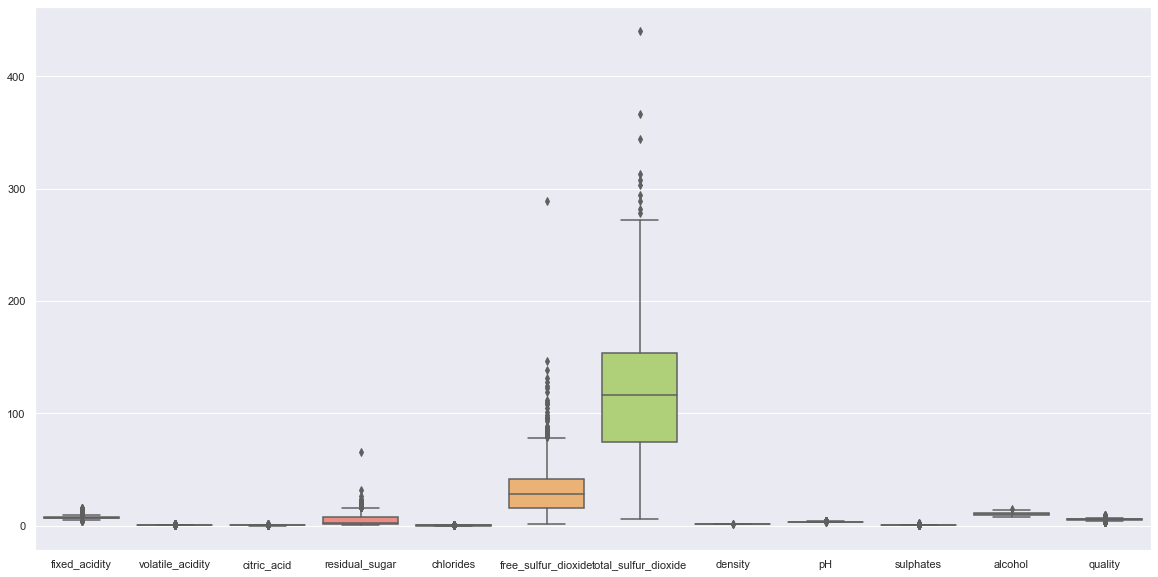

In [80]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set3")
plt.show()

## We can see that there are Some outliers.So now let's remove those Outliers

In [14]:
lower_limit = df.free_sulfur_dioxide.mean() - 3*df.free_sulfur_dioxide.std()
upper_limit = df.free_sulfur_dioxide.mean() + 3*df.free_sulfur_dioxide.std()


In [15]:
print(lower_limit,upper_limit)

-23.37848013650006 83.45178840717675


In [16]:
df2 = df[(df.free_sulfur_dioxide > lower_limit) & (df.free_sulfur_dioxide < upper_limit)]

In [17]:
df.shape[0] - df2.shape[0]

27

In [18]:
lower_limit = df.total_sulfur_dioxide.mean() - 3*df.total_sulfur_dioxide.std()
upper_limit = df.total_sulfur_dioxide.mean() + 3*df.total_sulfur_dioxide.std()
print(lower_limit,upper_limit)

-56.21364706909998 284.43169218188194


In [19]:
df3 = df2[(df2.total_sulfur_dioxide > lower_limit) & (df2.total_sulfur_dioxide < upper_limit)]
df3.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately_High
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low


In [20]:
df2.shape[0] - df3.shape[0]

5

In [21]:
lower_limit = df3.residual_sugar.mean() - 3*df3.residual_sugar.std()
upper_limit = df3.residual_sugar.mean() + 3*df3.residual_sugar.std()
print(lower_limit,upper_limit)

-8.453765001045317 18.53759631723291


In [22]:
df4 = df3[(df3.residual_sugar > lower_limit) & (df3.residual_sugar < upper_limit)]
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately_High
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low


In [23]:
df3.shape[0] - df4.shape[0]

42

In [24]:
df4.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
acidity_levels          1
dtype: int64

In [25]:
df4.acidity_levels.value_counts()

Low                1330
Moderately_High    1318
Medium             1308
High               1289
Name: acidity_levels, dtype: int64

## There is a Null Value.So let's fill the Null Value

In [26]:
df4.fillna("Low",inplace=True)

c:\python38\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
df4.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
acidity_levels          0
dtype: int64

In [28]:
df4.acidity_levels.value_counts()

Low                1331
Moderately_High    1318
Medium             1308
High               1289
Name: acidity_levels, dtype: int64

In [29]:
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately_High
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low


In [30]:
dummies = pd.get_dummies(df4["color"],drop_first=True)

In [31]:
df4 = pd.concat([df4,dummies],axis=1)

In [32]:
df4.drop("color",axis=1,inplace=True)

In [33]:
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acidity_levels,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Moderately_High,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Moderately_High,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low,0


## Now lets Change the Categorical 'String' Variables into Numerical Variables

In [34]:
df4.acidity_levels.value_counts()

Low                1331
Moderately_High    1318
Medium             1308
High               1289
Name: acidity_levels, dtype: int64

In [35]:
mapping = {"Low" : 0,"Medium": 1, "Moderately_High" : 2, "High" : 3}
df4["acidity_levels"] =  df4["acidity_levels"].map(mapping)

In [36]:
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acidity_levels,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0


In [37]:
df4.quality.value_counts()

6    2294
5    1722
7     850
4     204
8     146
3      25
9       5
Name: quality, dtype: int64

In [38]:
quaity_mapping = { 3 : "Low",4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
df4["quality"] =  df4["quality"].map(quaity_mapping)

In [39]:
df4.quality.value_counts()

Medium    4866
Low        229
High       151
Name: quality, dtype: int64

In [40]:
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acidity_levels,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,2,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Medium,0,0


In [42]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df4["quality"] =  df4["quality"].map(mapping_quality)

In [43]:
df4.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acidity_levels,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,2,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,0,0


In [41]:
from sklearn.preprocessing import StandardScaler

In [44]:
x = df4.drop("quality",axis=True)
y = df4["quality"]

## Lets Select the best Features for our Model

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [48]:
print(model.feature_importances_)

[0.08307664 0.10389634 0.08303626 0.08184542 0.08283912 0.10106074
 0.08354764 0.08065654 0.07621996 0.08710333 0.09234673 0.03375416
 0.01061712]


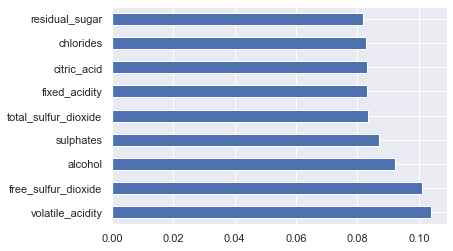

In [49]:
feat_importances = pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

## Now Let's select the best model for our Dataset

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [51]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }
    
}

In [52]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(x,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [53]:
df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [54]:
df5

,Model,Best_Score,Best_Params
0,svm,0.927755,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.921466,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.927183,"{'max_depth': 5, 'n_estimators': 5}"
3,naive_bayes,0.722065,{}
4,logistic_regression,0.927755,{'C': 5}


In [66]:
from sklearn.model_selection import cross_val_score
clf_svm = SVC(kernel="rbf",C=1)
scores = cross_val_score(clf_svm,x,y,cv=8,scoring="accuracy")

In [67]:
scores

array([0.92835366, 0.92835366, 0.92682927, 0.92682927, 0.92682927,
       0.92682927, 0.92824427, 0.92824427])

In [68]:
scores.mean()

0.9275641174827779

## So we are getting  92%  Accuracy for predicting the  Quality of Wine

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [70]:
clf_svm1 = SVC(kernel="rbf",C=1)
clf_svm1.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
y_pred = clf_svm1.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [76]:
accuracy

0.9238095238095239

## Now Lets see the Real value and Predicted Value

In [77]:
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [79]:
accuracy_dataframe.head()

,y_test,y_pred
3951,1,1
2829,0,1
4083,1,1
4749,1,1
3732,1,1
